In [25]:
import numpy as np
import seaborn as sns
import math
import pandas as pd
# Can be done with math


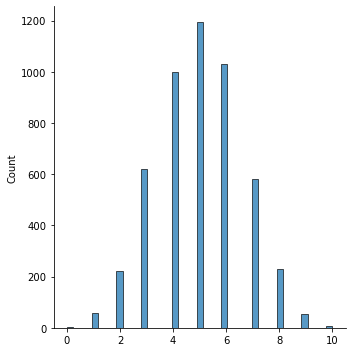

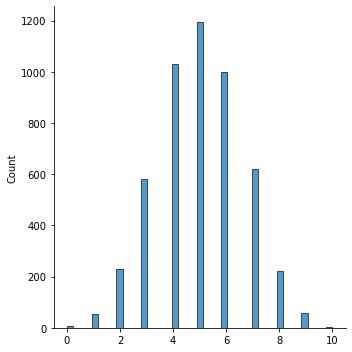

In [8]:

sample = np.random.binomial(10,0.5,5000)
negsample = [10 - x for x in sample]
sns.displot(sample)
sns.displot(negsample)
# Both of the graphs

<Axes: xlabel='n/N', ylabel='Sum'>

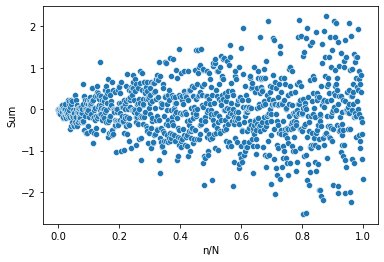

In [30]:
# Show the convergence thing
def run(n):
    sample = np.random.binomial(1,0.5,n)
    iid = [-1 if b == 0 else b for b in sample]
    gain = sum(iid)
    return gain
# Defined the Big N
big_N = 1000
run_list = np.arange(big_N)
x_val = [x/big_N for x in run_list]
y_val = [run(x)*1/math.sqrt(1000) for x in run_list]
data = pd.DataFrame({'n/N': x_val, 'Sum': y_val})
sns.scatterplot(x='n/N', y='Sum', data=data)


In [ ]:
# Part two, symmetry property

# Generation of Bernouille Scheme
# List of Possible Values
# List of probability of picking value
def berScheme(values,prob):
    if sum(prob) != 1:
        print("Error, not valid")
    return np.random.choice(values, p=prob)
# Use this for Cantor Distribution
# Show property being verified

In [ ]:
# Exponential distribution generator
# Poisson distribution generator
# X^2 generator

In [ ]:
# Empirical Verification of law of large number
# Investigate some other things